<a href="https://colab.research.google.com/github/Varija-Doshi/ML---Student-Grades-Prediction/blob/main/StudentGradePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, max_error
import matplotlib.pyplot as plt 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("drive/MyDrive/Data/student-mat.csv", sep=";")
# Since our data is seperated by semicolons we need to do sep=";"
# data contains about 396 rows , ie training set size = m = 396

In [4]:
print(data.head())
# To see the data of first 5 students

  school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1     GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2     GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3     GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4     GP   F   16       U     GT3       T  ...     2       5        4   6  10  10

[5 rows x 33 columns]


In [5]:
# Taking only relevant features

data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

In [12]:
# considering we have to predict the G3 values 

predict = "G3"
# drop the column from the original data set and make a new array of column type (axis = 1)
X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict]) # Labels

In [9]:
def plot_corr(df, size=11):
    """ 
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """
    
    
    corr = df.corr()  #data frame correlation function 
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)   # color code the rectangles by correlation values
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

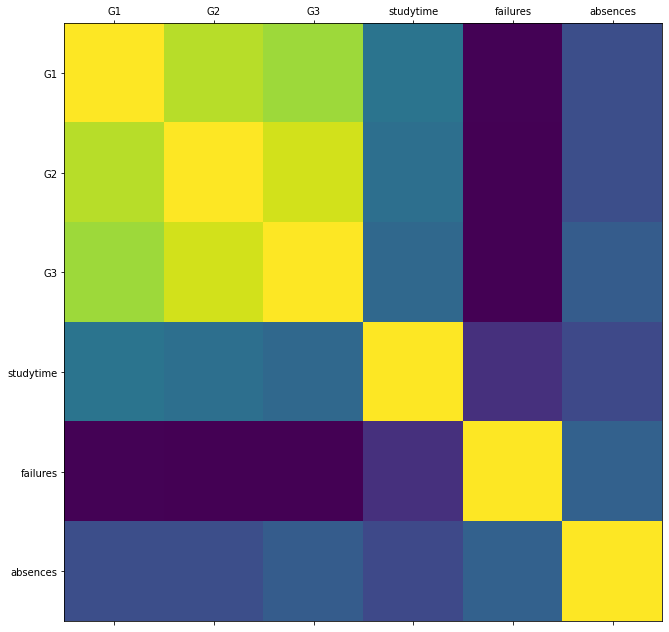

In [15]:
plot_corr(data)

In [14]:
data.corr()

,G1,G2,G3,studytime,failures,absences
G1,1.000000,0.852118,0.801468,0.160612,-0.354718,-0.031003
G2,0.852118,1.000000,0.904868,0.135880,-0.355896,-0.031777
G3,0.801468,0.904868,1.000000,0.097820,-0.360415,0.034247
studytime,0.160612,0.135880,0.097820,1.000000,-0.173563,-0.062700
failures,-0.354718,-0.355896,-0.360415,-0.173563,1.000000,0.063726
absences,-0.031003,-0.031777,0.034247,-0.062700,0.063726,1.000000


In [ ]:
# splits the data in test and train data sets train = 70% and test = 30 %

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
# Choosing the model from linear model
model = linear_model.LinearRegression()

In [ ]:
# fit the data 
model.fit(x_train, y_train)
acc = model.score(x_test, y_test) # acc stands for accuracy 
print(acc)

# y predicted
y_pred = model.predict(x_test)

# mean square error
print('Mean squared error:', mean_squared_error(y_test, np.around(y_pred)))

#acuracy score
print('Absolute error:', mean_absolute_error(y_test, np.around(y_pred)))

print('Max error:', max_error(y_test, np.around(y_pred)))

0.8076801471911124
Mean squared error: 4.714285714285714
Absolute error 1.319327731092437
Max error 9.0


In [ ]:
print('Coefficient: \n', model.coef_) # These are each slope value
print('Intercept: \n', model.intercept_) # This is the intercept

#showing the predictions made by the model 



for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])